# Ejercicio 2
## **a)** Respuesta en frecuencia de filtros elíptico y FIR

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10, angle, unwrap, pi, cos
from scipy.signal import iirfilter, remez, freqz, lfilter

In [38]:
fc = 0.6
b_ellip, a_ellip = iirfilter (8, fc, 0.1, 35, btype='lowpass', ftype='ellip')
print('b_ellip = ', b_ellip, '\na_ellip = ', a_ellip)

b_ellip =  [0.15620398 0.67669535 1.66486425 2.70944269 3.17780006 2.70944269
 1.66486425 0.67669535 0.15620398] 
a_ellip =  [1.         1.50074182 3.33457281 2.70127724 2.9667977  1.22864265
 0.84384041 0.10406763 0.06966273]


In [39]:
b_fir = remez(71, [0, fc, 0.62, 1], [1, 0], fs = 2)
print('b_fir = ', b_fir)

b_fir =  [-0.02806378  0.04297852  0.02203324  0.00098689  0.00721855  0.00982493
 -0.00674707 -0.0018912   0.01074568 -0.00452812 -0.00806576  0.01096331
  0.00120869 -0.01292484  0.00793604  0.00874003 -0.01517784  0.00103731
  0.01638894 -0.01302669 -0.00927311  0.02183503 -0.00517764 -0.02186693
  0.02241985  0.009676   -0.03490378  0.01448619  0.03384421 -0.0462356
 -0.00987784  0.07794204 -0.05393767 -0.10136253  0.29942928  0.60999891
  0.29942928 -0.10136253 -0.05393767  0.07794204 -0.00987784 -0.0462356
  0.03384421  0.01448619 -0.03490378  0.009676    0.02241985 -0.02186693
 -0.00517764  0.02183503 -0.00927311 -0.01302669  0.01638894  0.00103731
 -0.01517784  0.00874003  0.00793604 -0.01292484  0.00120869  0.01096331
 -0.00806576 -0.00452812  0.01074568 -0.0018912  -0.00674707  0.00982493
  0.00721855  0.00098689  0.02203324  0.04297852 -0.02806378]


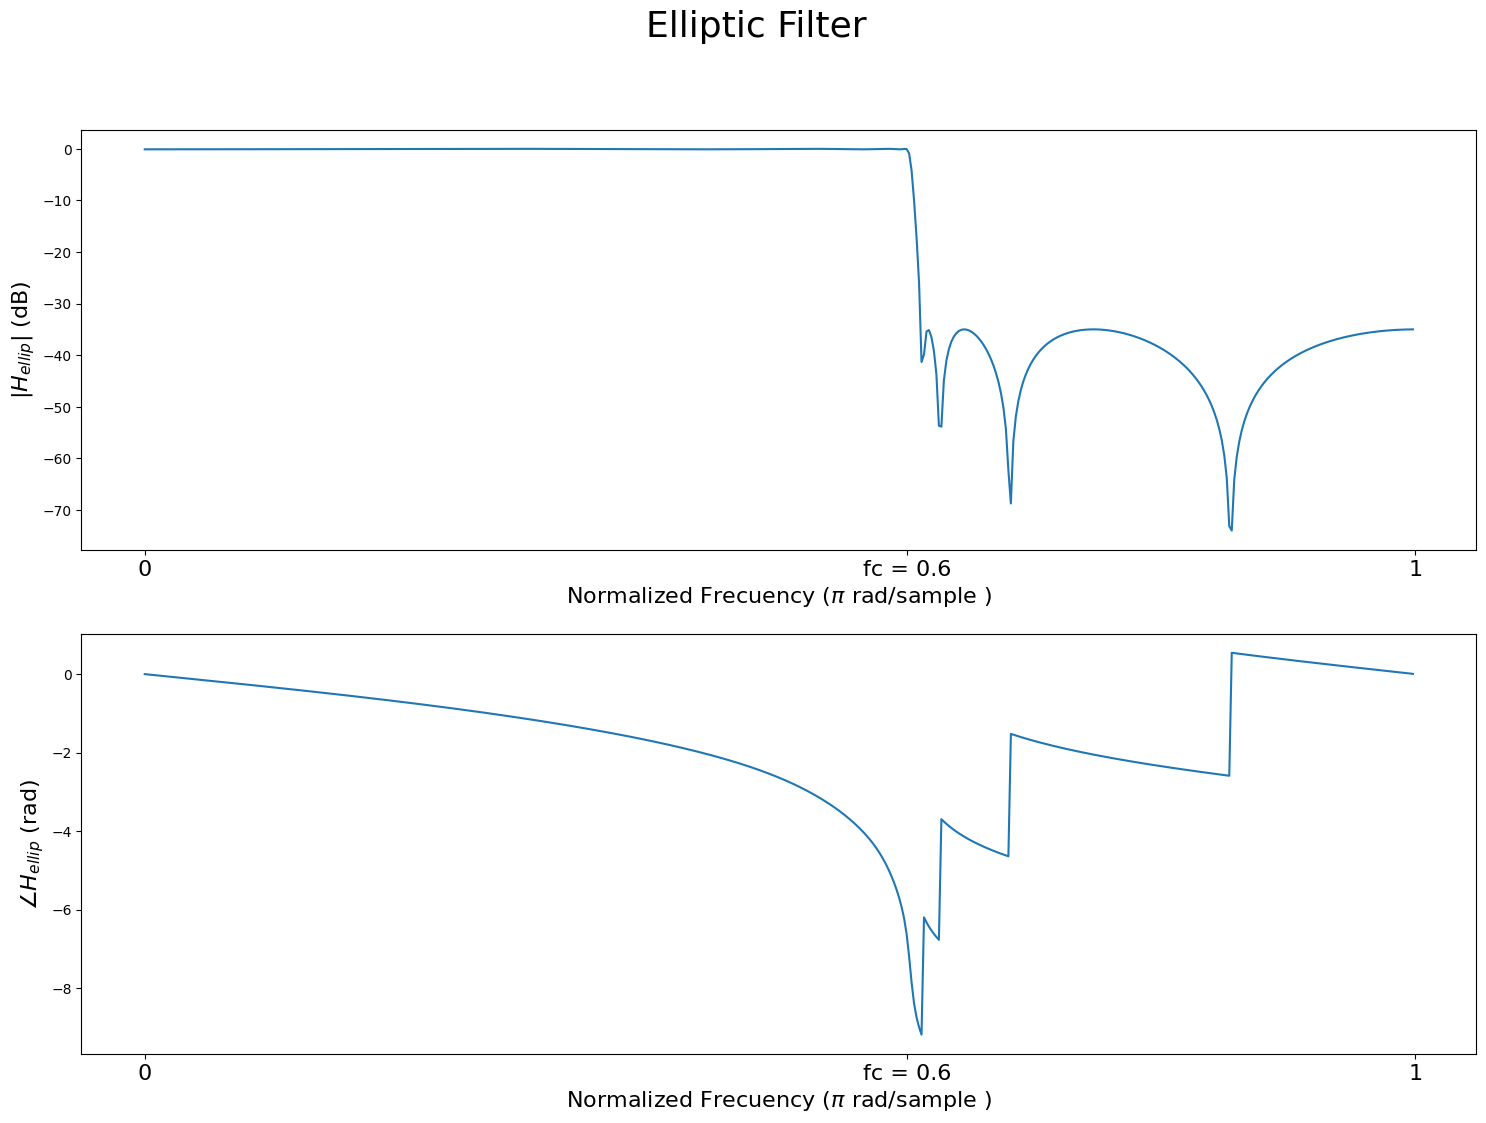

In [40]:
w_ellip, H_ellip = freqz(b_ellip, a_ellip)
fig, axs = plt.subplots(2, 1, figsize=(18,12))
fig.suptitle('Elliptic Filter',fontsize=26)

axs[0].plot(w_ellip, 20*log10(abs(H_ellip)))
axs[1].plot(w_ellip, unwrap(angle(H_ellip)))

axs[0].set_xlabel(r'Normalized Frecuency ($\pi$ rad/sample )', fontsize=16)
axs[0].set_xticks([0, fc*pi , pi])
axs[0].set_xticklabels(['0', f'fc = {fc}', '1'], fontsize=16)
axs[0].set_ylabel(r'$|H_{ellip}|$ (dB)', fontsize=16)

axs[1].set_xlabel(r'Normalized Frecuency ($\pi$ rad/sample )', fontsize=16)
axs[1].set_xticks([0, fc*pi , pi])
axs[1].set_xticklabels(['0', f'fc = {fc}', '1'], fontsize=16)
axs[1].set_ylabel(r'$\angle H_{ellip}$ (rad)', fontsize=16)

plt.show()

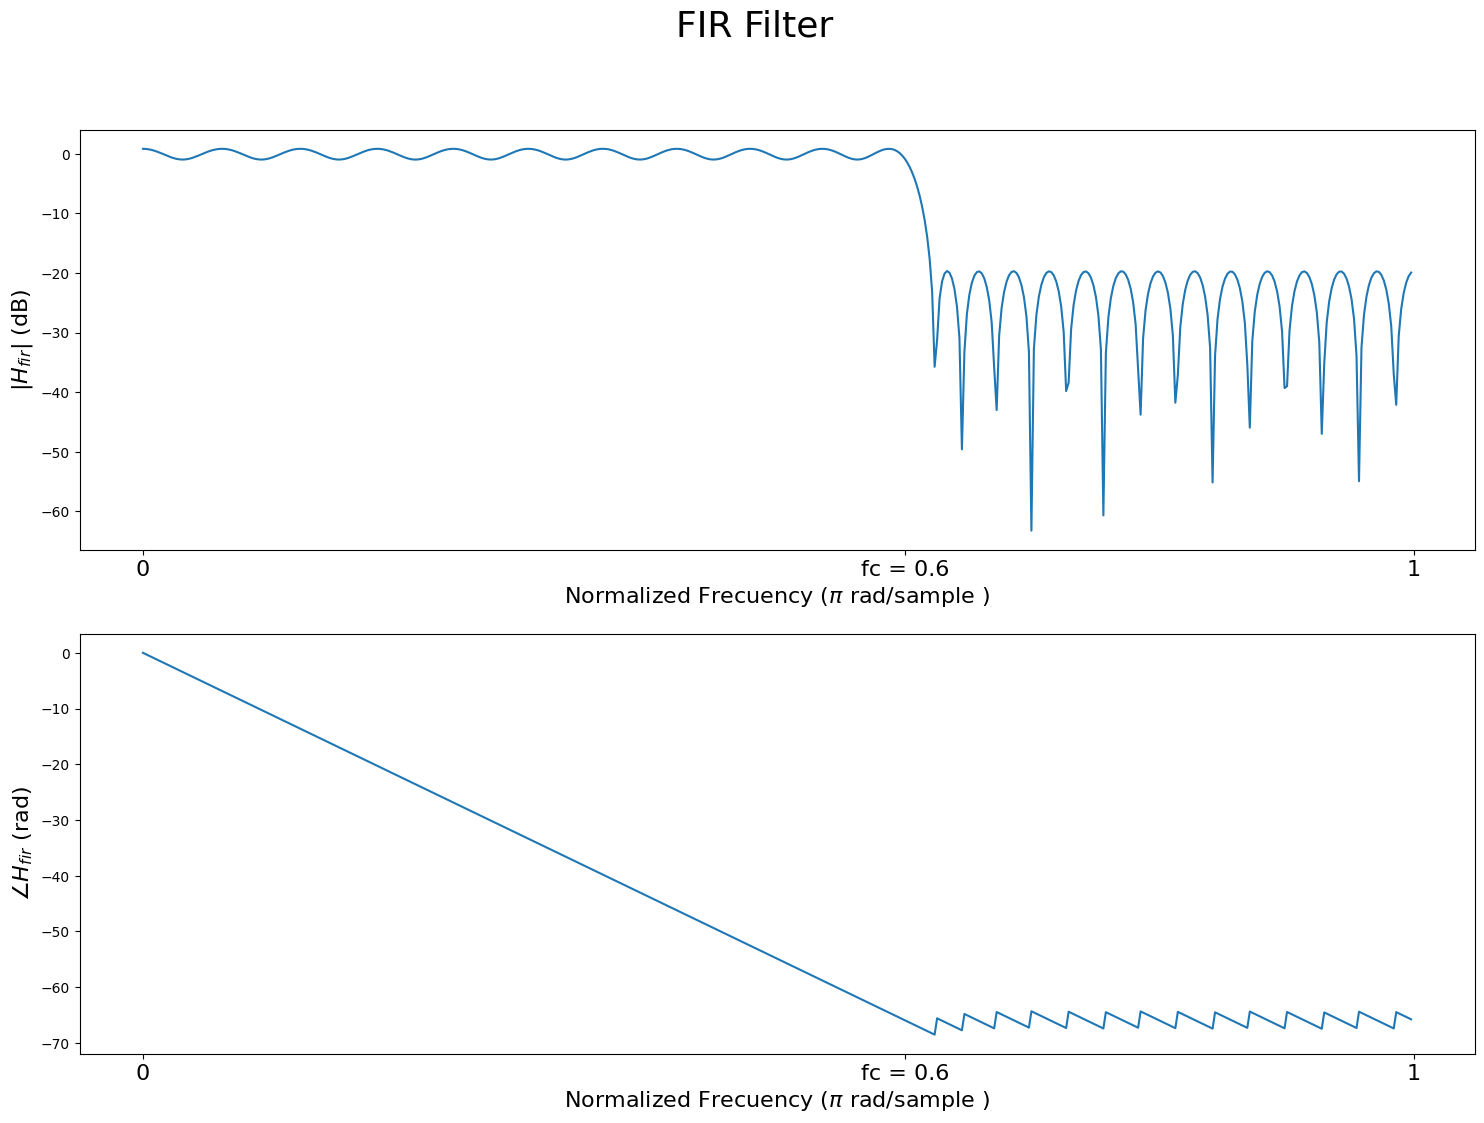

In [41]:
w_fir, H_fir = freqz(b_fir)
fig, axs = plt.subplots(2, 1, figsize=(18,12))
fig.suptitle('FIR Filter',fontsize=26)

axs[0].plot(w_fir, 20*log10(abs(H_fir)))
axs[1].plot(w_fir, unwrap(angle(H_fir)))

axs[0].set_xlabel(r'Normalized Frecuency ($\pi$ rad/sample )', fontsize=16)
axs[0].set_xticks([0, fc*pi , pi])
axs[0].set_xticklabels(['0', f'fc = {fc}', '1'], fontsize=16)
axs[0].set_ylabel(r'$|H_{fir}|$ (dB)', fontsize=16)

axs[1].set_xlabel(r'Normalized Frecuency ($\pi$ rad/sample )', fontsize=16)
axs[1].set_xticks([0, fc*pi , pi])
axs[1].set_xticklabels(['0', f'fc = {fc}', '1'], fontsize=16)
axs[1].set_ylabel(r'$\angle H_{fir}$ (rad)', fontsize=16)

plt.show()

## **b)** Respuesta de filtros a entrada $x[n] = \cos(0.1\pi n) + \cos(0.5\pi n)$

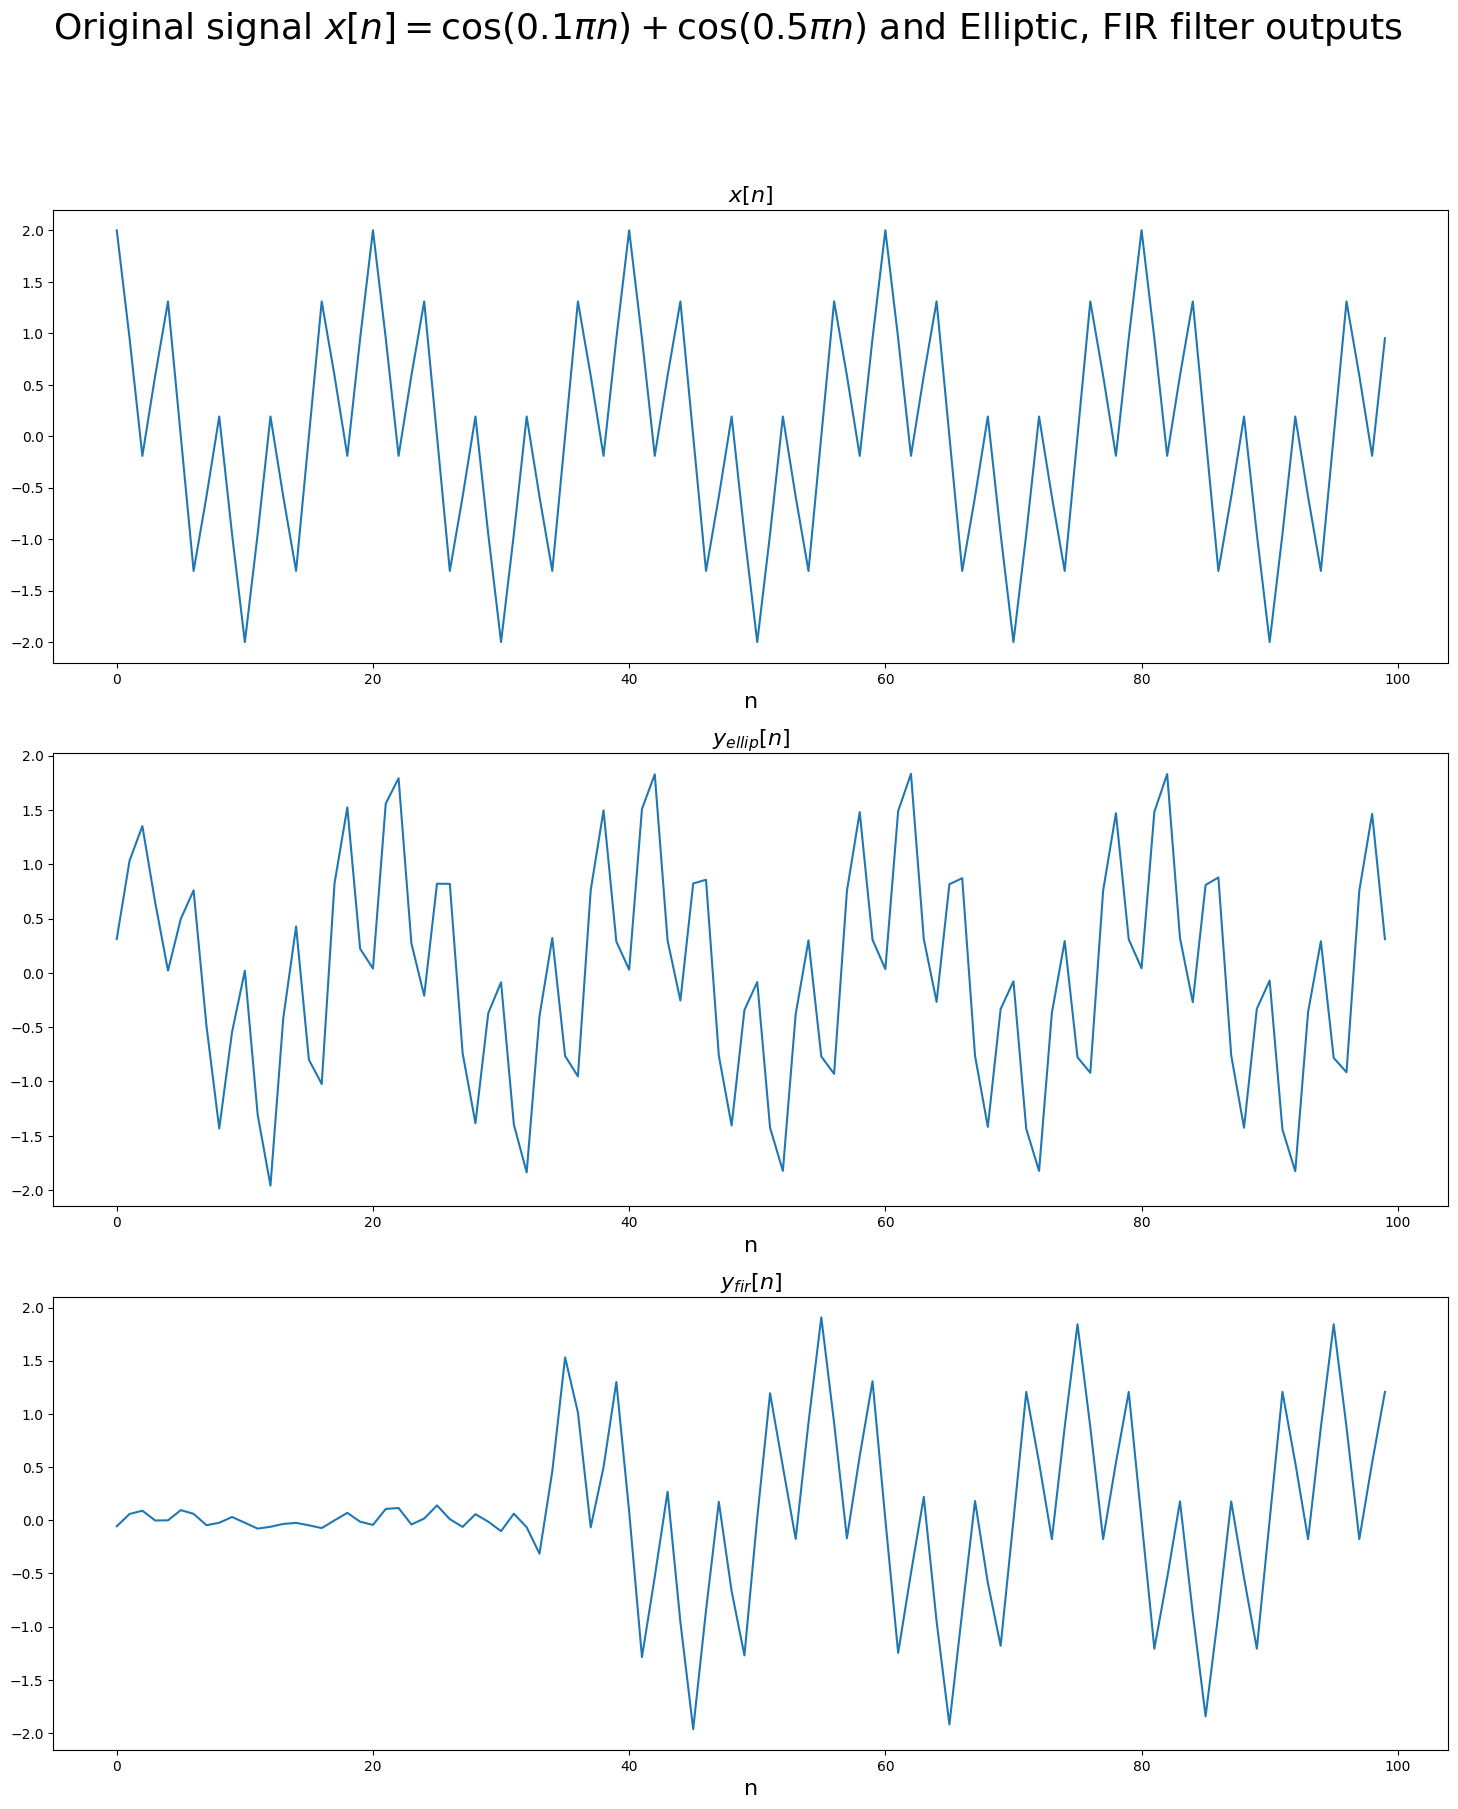

In [42]:
n = np.arange(100)
x = cos(0.1*pi*n) + cos(0.5*pi*n)
y_ellip = lfilter(b_ellip, a_ellip, x)
y_fir = lfilter(b_fir, 1, x)

fig, axs = plt.subplots(3, 1, figsize=(18,20))
title = r'Original signal $x[n] = \cos(0.1\pi n) + \cos(0.5\pi n)$ and Elliptic, FIR filter outputs'
fig.suptitle(title,fontsize=26)

axs[0].plot(n,x)
axs[1].plot(n,y_ellip)
axs[2].plot(n,y_fir)

axs[0].set_xlabel('n', fontsize=16)
axs[0].set_title(r'$x[n]$', fontsize=16)

axs[1].set_xlabel('n', fontsize=16)
axs[1].set_title(r'$y_{ellip}[n]$', fontsize=16)

axs[2].set_xlabel('n', fontsize=16)
axs[2].set_title(r'$y_{fir}[n]$', fontsize=16)

plt.show()






## **c)** Análisis de Fase

In [43]:
for f in [0.1, 0.5]:
    ns =np.argwhere(np.abs(w_ellip - f*pi) < 1e-2)
    print(ns.flatten())
    print(w_ellip[ns].flatten())
    ns = ns.item(-1)
    print(unwrap(angle(H_ellip)).item(ns))

[50 51 52]
[0.30679616 0.31293208 0.319068  ]
-0.33877780650422235
[255 256 257]
[1.5646604  1.57079633 1.57693225]
-2.676958115768506
